## Optimizing Length of links for minimum motor torque
**Kinematic and Dynamic analysis + Genetic algorithm**
<br>V1: Kinematic checked

Google Colab Preparations...

In [1]:
"""from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Mech/Ihsan"""
 
!pip install jax
!pip install geneticalgorithm

     |████████████████████████████████| 51kB 3.9MB/s 
  Created wheel for func-timeout: filename=func_timeout-4.3.5-cp37-none-any.whl size=15079 sha256=f310093cec59ed23e57393660e4219eb30065411b049813190ebfbba2422a1ae
  Stored in directory: /root/.cache/pip/wheels/46/7c/4f/24f1d2d5bbff92219debe7ea19af84f76ddeb90dd4ec544f26
Successfully built func-timeout


Importing Libraries

In [2]:
import numpy as np
import math
#import jax.numpy as np
#from jax import jit
from geneticalgorithm import geneticalgorithm as ga
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, newton_krylov, anderson

In [3]:
H = 0.2
density = 2000 * (0.005*0.02) #Link Material(Carbon Fiber) Density (kg/m)
g = 9.81                      #gravitational acceleration (m/s2)

Solving 4-bar Mechanism Forward Kinematics

In [4]:
#@jit
def kinematic(omega1,alpha1,N,L,R,theta):

    global H

    is_singular = False

    ######## Analytic Solution Calculated With Maple ########
    phi = math.atan2((-H * N * math.sin(theta) * math.sqrt(2) - H * N * math.sqrt(2) * math.cos(theta) - H * (-2 * H * N ** 2 * math.sqrt(2) * math.sin(theta) ** 2 + 2 * H * N ** 2 * math.sqrt(2) * math.cos(theta) * math.sin(theta) + H ** 3 * math.sqrt(2) - 2 * H ** 2 * N * math.sin(theta) - 4 * H ** 2 * N * math.cos(theta) + H * L ** 2 * math.sqrt(2) + 3 * H * N ** 2 * math.sqrt(2) - H * math.sqrt(2) * R ** 2 - 2 * L ** 2 * N * math.cos(theta) - 2 * N ** 3 * math.cos(theta) + 2 * N * math.cos(theta) * R ** 2 - math.sqrt(-8 * H * L ** 2 * N ** 3 * math.sqrt(2) * math.sin(theta) ** 2 * math.cos(theta) - 8 * H * L ** 2 * N ** 3 * math.sqrt(2) * math.sin(theta) * math.cos(theta) ** 2 - 8 * H * N ** 3 * math.sqrt(2) * math.sin(theta) ** 2 * math.cos(theta) * R ** 2 + 8 * H * N ** 3 * math.sqrt(2) * math.sin(theta) * math.cos(theta) ** 2 * R ** 2 - 8 * H * L ** 2 * N * math.sqrt(2) * math.sin(theta) * R ** 2 - 2 * H ** 6 - 4 * N ** 6 - 8 * H ** 4 * N ** 2 + 4 * H ** 4 * R ** 2 - 2 * H ** 2 * L ** 4 - 2 * H ** 2 * N ** 4 - 2 * H ** 2 * R ** 4 - 4 * L ** 4 * N ** 2 - 8 * L ** 2 * N ** 4 + 8 * N ** 4 * R ** 2 - 4 * N ** 2 * R ** 4 + 4 * H ** 4 * L ** 2 + 4 * N ** 6 * math.cos(theta) ** 2 - 16 * H ** 2 * N ** 4 * math.sin(theta) ** 3 * math.cos(theta) + 8 * H ** 2 * N ** 4 * math.sin(theta) ** 2 * math.cos(theta) ** 2 - 24 * H ** 4 * N ** 2 * math.sin(theta) * math.cos(theta) + 8 * H ** 3 * N ** 3 * math.sqrt(2) * math.sin(theta) ** 3 + 24 * H ** 2 * L ** 2 * N ** 2 * math.sin(theta) ** 2 - 16 * H ** 2 * N ** 4 * math.sin(theta) * math.cos(theta) + 24 * H ** 2 * N ** 2 * math.sin(theta) ** 2 * R ** 2 + 8 * H ** 5 * N * math.sqrt(2) * math.sin(theta) + 4 * H ** 5 * N * math.sqrt(2) * math.cos(theta) + 20 * H ** 3 * N ** 3 * math.sqrt(2) * math.sin(theta) + 4 * H ** 3 * N ** 3 * math.sqrt(2) * math.cos(theta) + 12 * H * N ** 5 * math.sqrt(2) * math.sin(theta) - 8 * L ** 2 * N ** 2 * math.cos(theta) ** 2 * R ** 2 + 4 * L ** 4 * N ** 2 * math.cos(theta) ** 2 + 16 * L ** 2 * N ** 4 * math.sin(theta) ** 2 + 8 * L ** 2 * N ** 4 * math.cos(theta) ** 2 - 8 * N ** 4 * math.cos(theta) ** 2 * R ** 2 + 4 * N ** 2 * math.cos(theta) ** 2 * R ** 4 + 4 * H ** 2 * L ** 2 * N ** 2 + 4 * H ** 2 * L ** 2 * R ** 2 + 4 * H ** 2 * N ** 2 * R ** 2 + 8 * L ** 2 * N ** 2 * R ** 2 + 8 * H ** 2 * N ** 4 * math.sin(theta) ** 4 - 20 * H ** 4 * N ** 2 * math.sin(theta) ** 2 - 40 * H ** 2 * N ** 4 * math.sin(theta) ** 2 + 24 * H ** 3 * N ** 3 * math.sqrt(2) * math.sin(theta) ** 2 * math.cos(theta) + 16 * H ** 2 * L ** 2 * N ** 2 * math.sin(theta) * math.cos(theta) + 16 * H ** 2 * N ** 2 * math.sin(theta) * math.cos(theta) * R ** 2 - 16 * H * L ** 2 * N ** 3 * math.sqrt(2) * math.sin(theta) ** 3 + 8 * H * N ** 5 * math.sqrt(2) * math.sin(theta) ** 2 * math.cos(theta) - 8 * H * N ** 5 * math.sqrt(2) * math.sin(theta) * math.cos(theta) ** 2 - 12 * H ** 3 * L ** 2 * N * math.sqrt(2) * math.sin(theta) - 4 * H ** 3 * L ** 2 * N * math.sqrt(2) * math.cos(theta) - 12 * H ** 3 * N * math.sqrt(2) * math.sin(theta) * R ** 2 - 4 * H ** 3 * N * math.sqrt(2) * math.cos(theta) * R ** 2 + 4 * H * L ** 4 * N * math.sqrt(2) * math.sin(theta) - 16 * H * N ** 3 * math.sqrt(2) * math.sin(theta) * R ** 2 + 4 * H * N * math.sqrt(2) * math.sin(theta) * R ** 4)) / (-H * N * math.sin(theta) * math.sqrt(2) - H * N * math.sqrt(2) * math.cos(theta) + H ** 2 + N ** 2) * math.sqrt(2) / 4 + N * (-2 * H * N ** 2 * math.sqrt(2) * math.sin(theta) ** 2 + 2 * H * N ** 2 * math.sqrt(2) * math.cos(theta) * math.sin(theta) + H ** 3 * math.sqrt(2) - 2 * H ** 2 * N * math.sin(theta) - 4 * H ** 2 * N * math.cos(theta) + H * L ** 2 * math.sqrt(2) + 3 * H * N ** 2 * math.sqrt(2) - H * math.sqrt(2) * R ** 2 - 2 * L ** 2 * N * math.cos(theta) - 2 * N ** 3 * math.cos(theta) + 2 * N * math.cos(theta) * R ** 2 - math.sqrt(-8 * H * L ** 2 * N ** 3 * math.sqrt(2) * math.sin(theta) ** 2 * math.cos(theta) - 8 * H * L ** 2 * N ** 3 * math.sqrt(2) * math.sin(theta) * math.cos(theta) ** 2 - 8 * H * N ** 3 * math.sqrt(2) * math.sin(theta) ** 2 * math.cos(theta) * R ** 2 + 8 * H * N ** 3 * math.sqrt(2) * math.sin(theta) * math.cos(theta) ** 2 * R ** 2 - 8 * H * L ** 2 * N * math.sqrt(2) * math.sin(theta) * R ** 2 - 2 * H ** 6 - 4 * N ** 6 - 8 * H ** 4 * N ** 2 + 4 * H ** 4 * R ** 2 - 2 * H ** 2 * L ** 4 - 2 * H ** 2 * N ** 4 - 2 * H ** 2 * R ** 4 - 4 * L ** 4 * N ** 2 - 8 * L ** 2 * N ** 4 + 8 * N ** 4 * R ** 2 - 4 * N ** 2 * R ** 4 + 4 * H ** 4 * L ** 2 + 4 * N ** 6 * math.cos(theta) ** 2 - 16 * H ** 2 * N ** 4 * math.sin(theta) ** 3 * math.cos(theta) + 8 * H ** 2 * N ** 4 * math.sin(theta) ** 2 * math.cos(theta) ** 2 - 24 * H ** 4 * N ** 2 * math.sin(theta) * math.cos(theta) + 8 * H ** 3 * N ** 3 * math.sqrt(2) * math.sin(theta) ** 3 + 24 * H ** 2 * L ** 2 * N ** 2 * math.sin(theta) ** 2 - 16 * H ** 2 * N ** 4 * math.sin(theta) * math.cos(theta) + 24 * H ** 2 * N ** 2 * math.sin(theta) ** 2 * R ** 2 + 8 * H ** 5 * N * math.sqrt(2) * math.sin(theta) + 4 * H ** 5 * N * math.sqrt(2) * math.cos(theta) + 20 * H ** 3 * N ** 3 * math.sqrt(2) * math.sin(theta) + 4 * H ** 3 * N ** 3 * math.sqrt(2) * math.cos(theta) + 12 * H * N ** 5 * math.sqrt(2) * math.sin(theta) - 8 * L ** 2 * N ** 2 * math.cos(theta) ** 2 * R ** 2 + 4 * L ** 4 * N ** 2 * math.cos(theta) ** 2 + 16 * L ** 2 * N ** 4 * math.sin(theta) ** 2 + 8 * L ** 2 * N ** 4 * math.cos(theta) ** 2 - 8 * N ** 4 * math.cos(theta) ** 2 * R ** 2 + 4 * N ** 2 * math.cos(theta) ** 2 * R ** 4 + 4 * H ** 2 * L ** 2 * N ** 2 + 4 * H ** 2 * L ** 2 * R ** 2 + 4 * H ** 2 * N ** 2 * R ** 2 + 8 * L ** 2 * N ** 2 * R ** 2 + 8 * H ** 2 * N ** 4 * math.sin(theta) ** 4 - 20 * H ** 4 * N ** 2 * math.sin(theta) ** 2 - 40 * H ** 2 * N ** 4 * math.sin(theta) ** 2 + 24 * H ** 3 * N ** 3 * math.sqrt(2) * math.sin(theta) ** 2 * math.cos(theta) + 16 * H ** 2 * L ** 2 * N ** 2 * math.sin(theta) * math.cos(theta) + 16 * H ** 2 * N ** 2 * math.sin(theta) * math.cos(theta) * R ** 2 - 16 * H * L ** 2 * N ** 3 * math.sqrt(2) * math.sin(theta) ** 3 + 8 * H * N ** 5 * math.sqrt(2) * math.sin(theta) ** 2 * math.cos(theta) - 8 * H * N ** 5 * math.sqrt(2) * math.sin(theta) * math.cos(theta) ** 2 - 12 * H ** 3 * L ** 2 * N * math.sqrt(2) * math.sin(theta) - 4 * H ** 3 * L ** 2 * N * math.sqrt(2) * math.cos(theta) - 12 * H ** 3 * N * math.sqrt(2) * math.sin(theta) * R ** 2 - 4 * H ** 3 * N * math.sqrt(2) * math.cos(theta) * R ** 2 + 4 * H * L ** 4 * N * math.sqrt(2) * math.sin(theta) - 16 * H * N ** 3 * math.sqrt(2) * math.sin(theta) * R ** 2 + 4 * H * N * math.sqrt(2) * math.sin(theta) * R ** 4)) / (-H * N * math.sin(theta) * math.sqrt(2) - H * N * math.sqrt(2) * math.cos(theta) + H ** 2 + N ** 2) * math.cos(theta) / 2 + H ** 2 + L ** 2 + N ** 2 - R ** 2) / L / (H * math.sqrt(2) - 2 * N * math.sin(theta)), (-2 * H * N ** 2 * math.sqrt(2) * math.sin(theta) ** 2 + 2 * H * N ** 2 * math.sqrt(2) * math.cos(theta) * math.sin(theta) + H ** 3 * math.sqrt(2) - 2 * H ** 2 * N * math.sin(theta) - 4 * H ** 2 * N * math.cos(theta) + H * L ** 2 * math.sqrt(2) + 3 * H * N ** 2 * math.sqrt(2) - H * math.sqrt(2) * R ** 2 - 2 * L ** 2 * N * math.cos(theta) - 2 * N ** 3 * math.cos(theta) + 2 * N * math.cos(theta) * R ** 2 - math.sqrt(-8 * H * L ** 2 * N ** 3 * math.sqrt(2) * math.sin(theta) ** 2 * math.cos(theta) - 8 * H * L ** 2 * N ** 3 * math.sqrt(2) * math.sin(theta) * math.cos(theta) ** 2 - 8 * H * N ** 3 * math.sqrt(2) * math.sin(theta) ** 2 * math.cos(theta) * R ** 2 + 8 * H * N ** 3 * math.sqrt(2) * math.sin(theta) * math.cos(theta) ** 2 * R ** 2 - 8 * H * L ** 2 * N * math.sqrt(2) * math.sin(theta) * R ** 2 - 2 * H ** 6 - 4 * N ** 6 - 8 * H ** 4 * N ** 2 + 4 * H ** 4 * R ** 2 - 2 * H ** 2 * L ** 4 - 2 * H ** 2 * N ** 4 - 2 * H ** 2 * R ** 4 - 4 * L ** 4 * N ** 2 - 8 * L ** 2 * N ** 4 + 8 * N ** 4 * R ** 2 - 4 * N ** 2 * R ** 4 + 4 * H ** 4 * L ** 2 + 4 * N ** 6 * math.cos(theta) ** 2 - 16 * H ** 2 * N ** 4 * math.sin(theta) ** 3 * math.cos(theta) + 8 * H ** 2 * N ** 4 * math.sin(theta) ** 2 * math.cos(theta) ** 2 - 24 * H ** 4 * N ** 2 * math.sin(theta) * math.cos(theta) + 8 * H ** 3 * N ** 3 * math.sqrt(2) * math.sin(theta) ** 3 + 24 * H ** 2 * L ** 2 * N ** 2 * math.sin(theta) ** 2 - 16 * H ** 2 * N ** 4 * math.sin(theta) * math.cos(theta) + 24 * H ** 2 * N ** 2 * math.sin(theta) ** 2 * R ** 2 + 8 * H ** 5 * N * math.sqrt(2) * math.sin(theta) + 4 * H ** 5 * N * math.sqrt(2) * math.cos(theta) + 20 * H ** 3 * N ** 3 * math.sqrt(2) * math.sin(theta) + 4 * H ** 3 * N ** 3 * math.sqrt(2) * math.cos(theta) + 12 * H * N ** 5 * math.sqrt(2) * math.sin(theta) - 8 * L ** 2 * N ** 2 * math.cos(theta) ** 2 * R ** 2 + 4 * L ** 4 * N ** 2 * math.cos(theta) ** 2 + 16 * L ** 2 * N ** 4 * math.sin(theta) ** 2 + 8 * L ** 2 * N ** 4 * math.cos(theta) ** 2 - 8 * N ** 4 * math.cos(theta) ** 2 * R ** 2 + 4 * N ** 2 * math.cos(theta) ** 2 * R ** 4 + 4 * H ** 2 * L ** 2 * N ** 2 + 4 * H ** 2 * L ** 2 * R ** 2 + 4 * H ** 2 * N ** 2 * R ** 2 + 8 * L ** 2 * N ** 2 * R ** 2 + 8 * H ** 2 * N ** 4 * math.sin(theta) ** 4 - 20 * H ** 4 * N ** 2 * math.sin(theta) ** 2 - 40 * H ** 2 * N ** 4 * math.sin(theta) ** 2 + 24 * H ** 3 * N ** 3 * math.sqrt(2) * math.sin(theta) ** 2 * math.cos(theta) + 16 * H ** 2 * L ** 2 * N ** 2 * math.sin(theta) * math.cos(theta) + 16 * H ** 2 * N ** 2 * math.sin(theta) * math.cos(theta) * R ** 2 - 16 * H * L ** 2 * N ** 3 * math.sqrt(2) * math.sin(theta) ** 3 + 8 * H * N ** 5 * math.sqrt(2) * math.sin(theta) ** 2 * math.cos(theta) - 8 * H * N ** 5 * math.sqrt(2) * math.sin(theta) * math.cos(theta) ** 2 - 12 * H ** 3 * L ** 2 * N * math.sqrt(2) * math.sin(theta) - 4 * H ** 3 * L ** 2 * N * math.sqrt(2) * math.cos(theta) - 12 * H ** 3 * N * math.sqrt(2) * math.sin(theta) * R ** 2 - 4 * H ** 3 * N * math.sqrt(2) * math.cos(theta) * R ** 2 + 4 * H * L ** 4 * N * math.sqrt(2) * math.sin(theta) - 16 * H * N ** 3 * math.sqrt(2) * math.sin(theta) * R ** 2 + 4 * H * N * math.sqrt(2) * math.sin(theta) * R ** 4)) / (-H * N * math.sin(theta) * math.sqrt(2) - H * N * math.sqrt(2) * math.cos(theta) + H ** 2 + N ** 2) / L / 4)
    psi = math.atan2((-2 * N ** 2 * math.sin(theta) ** 2 * math.sqrt(2) + N * math.sqrt(2) * (-2 * H * N ** 2 * math.sqrt(2) * math.sin(theta) ** 2 + 2 * H * N ** 2 * math.sqrt(2) * math.cos(theta) * math.sin(theta) + H ** 3 * math.sqrt(2) - 2 * H ** 2 * N * math.sin(theta) - 4 * H ** 2 * N * math.cos(theta) + H * L ** 2 * math.sqrt(2) + 3 * H * N ** 2 * math.sqrt(2) - H * math.sqrt(2) * R ** 2 - 2 * L ** 2 * N * math.cos(theta) - 2 * N ** 3 * math.cos(theta) + 2 * N * math.cos(theta) * R ** 2 - math.sqrt(-8 * H * L ** 2 * N ** 3 * math.sqrt(2) * math.sin(theta) ** 2 * math.cos(theta) - 8 * H * L ** 2 * N ** 3 * math.sqrt(2) * math.sin(theta) * math.cos(theta) ** 2 - 8 * H * N ** 3 * math.sqrt(2) * math.sin(theta) ** 2 * math.cos(theta) * R ** 2 + 8 * H * N ** 3 * math.sqrt(2) * math.sin(theta) * math.cos(theta) ** 2 * R ** 2 - 8 * H * L ** 2 * N * math.sqrt(2) * math.sin(theta) * R ** 2 - 2 * H ** 6 - 4 * N ** 6 - 8 * H ** 4 * N ** 2 + 4 * H ** 4 * R ** 2 - 2 * H ** 2 * L ** 4 - 2 * H ** 2 * N ** 4 - 2 * H ** 2 * R ** 4 - 4 * L ** 4 * N ** 2 - 8 * L ** 2 * N ** 4 + 8 * N ** 4 * R ** 2 - 4 * N ** 2 * R ** 4 + 4 * H ** 4 * L ** 2 + 4 * N ** 6 * math.cos(theta) ** 2 - 16 * H ** 2 * N ** 4 * math.sin(theta) ** 3 * math.cos(theta) + 8 * H ** 2 * N ** 4 * math.sin(theta) ** 2 * math.cos(theta) ** 2 - 24 * H ** 4 * N ** 2 * math.sin(theta) * math.cos(theta) + 8 * H ** 3 * N ** 3 * math.sqrt(2) * math.sin(theta) ** 3 + 24 * H ** 2 * L ** 2 * N ** 2 * math.sin(theta) ** 2 - 16 * H ** 2 * N ** 4 * math.sin(theta) * math.cos(theta) + 24 * H ** 2 * N ** 2 * math.sin(theta) ** 2 * R ** 2 + 8 * H ** 5 * N * math.sqrt(2) * math.sin(theta) + 4 * H ** 5 * N * math.sqrt(2) * math.cos(theta) + 20 * H ** 3 * N ** 3 * math.sqrt(2) * math.sin(theta) + 4 * H ** 3 * N ** 3 * math.sqrt(2) * math.cos(theta) + 12 * H * N ** 5 * math.sqrt(2) * math.sin(theta) - 8 * L ** 2 * N ** 2 * math.cos(theta) ** 2 * R ** 2 + 4 * L ** 4 * N ** 2 * math.cos(theta) ** 2 + 16 * L ** 2 * N ** 4 * math.sin(theta) ** 2 + 8 * L ** 2 * N ** 4 * math.cos(theta) ** 2 - 8 * N ** 4 * math.cos(theta) ** 2 * R ** 2 + 4 * N ** 2 * math.cos(theta) ** 2 * R ** 4 + 4 * H ** 2 * L ** 2 * N ** 2 + 4 * H ** 2 * L ** 2 * R ** 2 + 4 * H ** 2 * N ** 2 * R ** 2 + 8 * L ** 2 * N ** 2 * R ** 2 + 8 * H ** 2 * N ** 4 * math.sin(theta) ** 4 - 20 * H ** 4 * N ** 2 * math.sin(theta) ** 2 - 40 * H ** 2 * N ** 4 * math.sin(theta) ** 2 + 24 * H ** 3 * N ** 3 * math.sqrt(2) * math.sin(theta) ** 2 * math.cos(theta) + 16 * H ** 2 * L ** 2 * N ** 2 * math.sin(theta) * math.cos(theta) + 16 * H ** 2 * N ** 2 * math.sin(theta) * math.cos(theta) * R ** 2 - 16 * H * L ** 2 * N ** 3 * math.sqrt(2) * math.sin(theta) ** 3 + 8 * H * N ** 5 * math.sqrt(2) * math.sin(theta) ** 2 * math.cos(theta) - 8 * H * N ** 5 * math.sqrt(2) * math.sin(theta) * math.cos(theta) ** 2 - 12 * H ** 3 * L ** 2 * N * math.sqrt(2) * math.sin(theta) - 4 * H ** 3 * L ** 2 * N * math.sqrt(2) * math.cos(theta) - 12 * H ** 3 * N * math.sqrt(2) * math.sin(theta) * R ** 2 - 4 * H ** 3 * N * math.sqrt(2) * math.cos(theta) * R ** 2 + 4 * H * L ** 4 * N * math.sqrt(2) * math.sin(theta) - 16 * H * N ** 3 * math.sqrt(2) * math.sin(theta) * R ** 2 + 4 * H * N * math.sqrt(2) * math.sin(theta) * R ** 4)) / (-H * N * math.sin(theta) * math.sqrt(2) - H * N * math.sqrt(2) * math.cos(theta) + H ** 2 + N ** 2) * math.cos(theta) / 2 + 2 * H * N * math.sin(theta) - 2 * H * N * math.cos(theta) + L ** 2 * math.sqrt(2) + N ** 2 * math.sqrt(2) - R ** 2 * math.sqrt(2) - H * (-2 * H * N ** 2 * math.sqrt(2) * math.sin(theta) ** 2 + 2 * H * N ** 2 * math.sqrt(2) * math.cos(theta) * math.sin(theta) + H ** 3 * math.sqrt(2) - 2 * H ** 2 * N * math.sin(theta) - 4 * H ** 2 * N * math.cos(theta) + H * L ** 2 * math.sqrt(2) + 3 * H * N ** 2 * math.sqrt(2) - H * math.sqrt(2) * R ** 2 - 2 * L ** 2 * N * math.cos(theta) - 2 * N ** 3 * math.cos(theta) + 2 * N * math.cos(theta) * R ** 2 - math.sqrt(-8 * H * L ** 2 * N ** 3 * math.sqrt(2) * math.sin(theta) ** 2 * math.cos(theta) - 8 * H * L ** 2 * N ** 3 * math.sqrt(2) * math.sin(theta) * math.cos(theta) ** 2 - 8 * H * N ** 3 * math.sqrt(2) * math.sin(theta) ** 2 * math.cos(theta) * R ** 2 + 8 * H * N ** 3 * math.sqrt(2) * math.sin(theta) * math.cos(theta) ** 2 * R ** 2 - 8 * H * L ** 2 * N * math.sqrt(2) * math.sin(theta) * R ** 2 - 2 * H ** 6 - 4 * N ** 6 - 8 * H ** 4 * N ** 2 + 4 * H ** 4 * R ** 2 - 2 * H ** 2 * L ** 4 - 2 * H ** 2 * N ** 4 - 2 * H ** 2 * R ** 4 - 4 * L ** 4 * N ** 2 - 8 * L ** 2 * N ** 4 + 8 * N ** 4 * R ** 2 - 4 * N ** 2 * R ** 4 + 4 * H ** 4 * L ** 2 + 4 * N ** 6 * math.cos(theta) ** 2 - 16 * H ** 2 * N ** 4 * math.sin(theta) ** 3 * math.cos(theta) + 8 * H ** 2 * N ** 4 * math.sin(theta) ** 2 * math.cos(theta) ** 2 - 24 * H ** 4 * N ** 2 * math.sin(theta) * math.cos(theta) + 8 * H ** 3 * N ** 3 * math.sqrt(2) * math.sin(theta) ** 3 + 24 * H ** 2 * L ** 2 * N ** 2 * math.sin(theta) ** 2 - 16 * H ** 2 * N ** 4 * math.sin(theta) * math.cos(theta) + 24 * H ** 2 * N ** 2 * math.sin(theta) ** 2 * R ** 2 + 8 * H ** 5 * N * math.sqrt(2) * math.sin(theta) + 4 * H ** 5 * N * math.sqrt(2) * math.cos(theta) + 20 * H ** 3 * N ** 3 * math.sqrt(2) * math.sin(theta) + 4 * H ** 3 * N ** 3 * math.sqrt(2) * math.cos(theta) + 12 * H * N ** 5 * math.sqrt(2) * math.sin(theta) - 8 * L ** 2 * N ** 2 * math.cos(theta) ** 2 * R ** 2 + 4 * L ** 4 * N ** 2 * math.cos(theta) ** 2 + 16 * L ** 2 * N ** 4 * math.sin(theta) ** 2 + 8 * L ** 2 * N ** 4 * math.cos(theta) ** 2 - 8 * N ** 4 * math.cos(theta) ** 2 * R ** 2 + 4 * N ** 2 * math.cos(theta) ** 2 * R ** 4 + 4 * H ** 2 * L ** 2 * N ** 2 + 4 * H ** 2 * L ** 2 * R ** 2 + 4 * H ** 2 * N ** 2 * R ** 2 + 8 * L ** 2 * N ** 2 * R ** 2 + 8 * H ** 2 * N ** 4 * math.sin(theta) ** 4 - 20 * H ** 4 * N ** 2 * math.sin(theta) ** 2 - 40 * H ** 2 * N ** 4 * math.sin(theta) ** 2 + 24 * H ** 3 * N ** 3 * math.sqrt(2) * math.sin(theta) ** 2 * math.cos(theta) + 16 * H ** 2 * L ** 2 * N ** 2 * math.sin(theta) * math.cos(theta) + 16 * H ** 2 * N ** 2 * math.sin(theta) * math.cos(theta) * R ** 2 - 16 * H * L ** 2 * N ** 3 * math.sqrt(2) * math.sin(theta) ** 3 + 8 * H * N ** 5 * math.sqrt(2) * math.sin(theta) ** 2 * math.cos(theta) - 8 * H * N ** 5 * math.sqrt(2) * math.sin(theta) * math.cos(theta) ** 2 - 12 * H ** 3 * L ** 2 * N * math.sqrt(2) * math.sin(theta) - 4 * H ** 3 * L ** 2 * N * math.sqrt(2) * math.cos(theta) - 12 * H ** 3 * N * math.sqrt(2) * math.sin(theta) * R ** 2 - 4 * H ** 3 * N * math.sqrt(2) * math.cos(theta) * R ** 2 + 4 * H * L ** 4 * N * math.sqrt(2) * math.sin(theta) - 16 * H * N ** 3 * math.sqrt(2) * math.sin(theta) * R ** 2 + 4 * H * N * math.sqrt(2) * math.sin(theta) * R ** 4)) / (-H * N * math.sin(theta) * math.sqrt(2) - H * N * math.sqrt(2) * math.cos(theta) + H ** 2 + N ** 2) / 2) / R / (H - math.sqrt(2) * N * math.sin(theta)), -(H * math.sqrt(2) - 2 * N * math.cos(theta) - (-2 * H * N ** 2 * math.sqrt(2) * math.sin(theta) ** 2 + 2 * H * N ** 2 * math.sqrt(2) * math.cos(theta) * math.sin(theta) + H ** 3 * math.sqrt(2) - 2 * H ** 2 * N * math.sin(theta) - 4 * H ** 2 * N * math.cos(theta) + H * L ** 2 * math.sqrt(2) + 3 * H * N ** 2 * math.sqrt(2) - H * math.sqrt(2) * R ** 2 - 2 * L ** 2 * N * math.cos(theta) - 2 * N ** 3 * math.cos(theta) + 2 * N * math.cos(theta) * R ** 2 - math.sqrt(-8 * H * L ** 2 * N ** 3 * math.sqrt(2) * math.sin(theta) ** 2 * math.cos(theta) - 8 * H * L ** 2 * N ** 3 * math.sqrt(2) * math.sin(theta) * math.cos(theta) ** 2 - 8 * H * N ** 3 * math.sqrt(2) * math.sin(theta) ** 2 * math.cos(theta) * R ** 2 + 8 * H * N ** 3 * math.sqrt(2) * math.sin(theta) * math.cos(theta) ** 2 * R ** 2 - 8 * H * L ** 2 * N * math.sqrt(2) * math.sin(theta) * R ** 2 - 2 * H ** 6 - 4 * N ** 6 - 8 * H ** 4 * N ** 2 + 4 * H ** 4 * R ** 2 - 2 * H ** 2 * L ** 4 - 2 * H ** 2 * N ** 4 - 2 * H ** 2 * R ** 4 - 4 * L ** 4 * N ** 2 - 8 * L ** 2 * N ** 4 + 8 * N ** 4 * R ** 2 - 4 * N ** 2 * R ** 4 + 4 * H ** 4 * L ** 2 + 4 * N ** 6 * math.cos(theta) ** 2 - 16 * H ** 2 * N ** 4 * math.sin(theta) ** 3 * math.cos(theta) + 8 * H ** 2 * N ** 4 * math.sin(theta) ** 2 * math.cos(theta) ** 2 - 24 * H ** 4 * N ** 2 * math.sin(theta) * math.cos(theta) + 8 * H ** 3 * N ** 3 * math.sqrt(2) * math.sin(theta) ** 3 + 24 * H ** 2 * L ** 2 * N ** 2 * math.sin(theta) ** 2 - 16 * H ** 2 * N ** 4 * math.sin(theta) * math.cos(theta) + 24 * H ** 2 * N ** 2 * math.sin(theta) ** 2 * R ** 2 + 8 * H ** 5 * N * math.sqrt(2) * math.sin(theta) + 4 * H ** 5 * N * math.sqrt(2) * math.cos(theta) + 20 * H ** 3 * N ** 3 * math.sqrt(2) * math.sin(theta) + 4 * H ** 3 * N ** 3 * math.sqrt(2) * math.cos(theta) + 12 * H * N ** 5 * math.sqrt(2) * math.sin(theta) - 8 * L ** 2 * N ** 2 * math.cos(theta) ** 2 * R ** 2 + 4 * L ** 4 * N ** 2 * math.cos(theta) ** 2 + 16 * L ** 2 * N ** 4 * math.sin(theta) ** 2 + 8 * L ** 2 * N ** 4 * math.cos(theta) ** 2 - 8 * N ** 4 * math.cos(theta) ** 2 * R ** 2 + 4 * N ** 2 * math.cos(theta) ** 2 * R ** 4 + 4 * H ** 2 * L ** 2 * N ** 2 + 4 * H ** 2 * L ** 2 * R ** 2 + 4 * H ** 2 * N ** 2 * R ** 2 + 8 * L ** 2 * N ** 2 * R ** 2 + 8 * H ** 2 * N ** 4 * math.sin(theta) ** 4 - 20 * H ** 4 * N ** 2 * math.sin(theta) ** 2 - 40 * H ** 2 * N ** 4 * math.sin(theta) ** 2 + 24 * H ** 3 * N ** 3 * math.sqrt(2) * math.sin(theta) ** 2 * math.cos(theta) + 16 * H ** 2 * L ** 2 * N ** 2 * math.sin(theta) * math.cos(theta) + 16 * H ** 2 * N ** 2 * math.sin(theta) * math.cos(theta) * R ** 2 - 16 * H * L ** 2 * N ** 3 * math.sqrt(2) * math.sin(theta) ** 3 + 8 * H * N ** 5 * math.sqrt(2) * math.sin(theta) ** 2 * math.cos(theta) - 8 * H * N ** 5 * math.sqrt(2) * math.sin(theta) * math.cos(theta) ** 2 - 12 * H ** 3 * L ** 2 * N * math.sqrt(2) * math.sin(theta) - 4 * H ** 3 * L ** 2 * N * math.sqrt(2) * math.cos(theta) - 12 * H ** 3 * N * math.sqrt(2) * math.sin(theta) * R ** 2 - 4 * H ** 3 * N * math.sqrt(2) * math.cos(theta) * R ** 2 + 4 * H * L ** 4 * N * math.sqrt(2) * math.sin(theta) - 16 * H * N ** 3 * math.sqrt(2) * math.sin(theta) * R ** 2 + 4 * H * N * math.sqrt(2) * math.sin(theta) * R ** 4)) / (-H * N * math.sin(theta) * math.sqrt(2) - H * N * math.sqrt(2) * math.cos(theta) + H ** 2 + N ** 2) / 2) / R)


    b = np.array([[-L*np.sin(phi),R*np.sin(psi)],
                  [L*np.cos(phi),-R*np.cos(psi)]])
    if np.linalg.det(b) == 0:
        is_singular = True
        return 0,0,0,0,0,0,is_singular
        
    first = np.array([N*np.sin(theta),-N*np.cos(theta)])
    first_order = np.dot(first,np.linalg.pinv(b))
    second = np.array([N*np.cos(theta) + L*first_order[0]**2*np.cos(phi) - R*first_order[1]**2*np.cos(psi),
                       N*np.sin(theta) + L*first_order[0]**2*np.sin(phi) - R*first_order[1]**2*np.sin(psi)])
    second_order = np.dot(np.linalg.pinv(b),second)

    omega2 = first_order[0] * omega1
    omega3 = first_order[1] * omega1

    alpha2 = alpha1 * first_order[0] + omega1**2 * second_order[0]
    alpha3 = alpha1 * first_order[1] + omega1 ** 2 * second_order[1]

    return phi,psi,omega2,omega3,alpha2,alpha3,is_singular

Solving 4-bar Mechanism Forward Kinetics

In [5]:
#@jit
def kinetic(N,L,R,theta,phi,psi,omega1,omega2,omega3,alpha1,alpha2,alpha3,tau1):

    global density
    global g
    global H

    m1 = density * H        # Shanks mass (Link N)
    m2 = density * L        # Link L mass
    m3 = density * R        # link R mass
    r1 = 0.2                # Shanks Center of mass

    #inertial moments (approximated)
    I1 = m1 * H**2 / 12
    I2 = m2 * L**2 / 12
    I3 = m3 * R**2 / 12

    A = np.array([N*np.cos(theta),N*np.sin(theta)])

    # CoM Position of Links
    CN = np.array([r1 * np.cos(theta+np.pi),
                  r1 * np.sin(theta+np.pi)])
    CL = np.array([L/2 * np.cos(phi),
                  L/2 * np.sin(phi)])
    CR = np.array([R/2 * np.cos(psi),
                  R/2 * np.sin(psi)])
    # CoM Acceleration of Links
    aN = np.array([-alpha1 * CN[1] - omega1**2 * CN[0],
                  alpha1 * CN[0] - omega1**2 * CN[1]])
    aL = np.array([-alpha1*A[1] - omega1**2*A[0] - alpha2*CL[1] - omega2**2*CL[0],
                  alpha1*A[0] - omega1**2*A[1] + alpha2*CL[0] - omega2**2*CL[1]])
    aR = np.array([-alpha3*CR[1] - omega3**2*CR[0],
                  alpha3*CR[0] - omega3**2*CR[1]])

    F1 = np.array([m1*aN[0],m1*aN[1]])
    F2 = np.array([m2*aL[0],m2*aL[1]])
    F3 = np.array([m3*aR[0],m3*aR[1]])

    M1 = I1 * alpha1
    M2 = I2 * alpha2
    M3 = I3 * alpha3

    A = np.array([[1,0,-1,0,0,0,0,0,0],
                  [0,-1,0,1,0,0,0,0,0],
                  [-N*np.sin(theta-np.pi),N*np.cos(theta-np.pi),0,0,0,0,0,0,0],
                  [1,0,0,0,-1,0,0,0,0],
                  [0,1,0,0,0,-1,0,0,0],
                  [0,0,0,0,-L*np.sin(phi),-L*np.cos(phi),0,0,0],
                  [0,0,0,0,-1,0,1,0,0],
                  [0,0,0,0,0,1,0,-1,0],
                  [0,0,0,0,R*np.sin(psi),R*np.cos(psi),0,0,1]])
    B = np.array([F1[0],
                  F1[1]+m1*g,
                  M1+m1*g*CN[0]+np.linalg.norm(np.cross(CN,F1))+tau1,
                  -F2[0],
                  F2[1]+m2*g,
                  M2+m2*g*CL[0]+np.linalg.norm(np.cross(CL,F2)),
                  F3[0],
                  F3[1]+m3*g,
                  M3+m3*g*CR[0]+np.linalg.norm(np.cross(CR,F3))])

    return np.linalg.solve(A,B)[8],omega3*np.linalg.solve(A,B)[8]

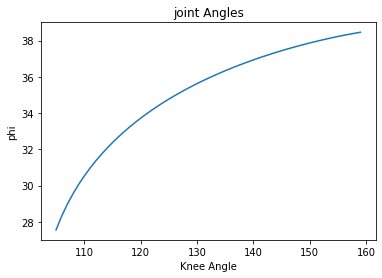

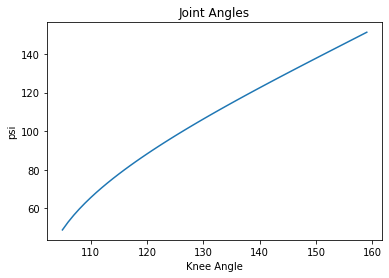

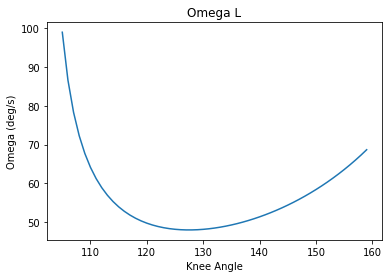

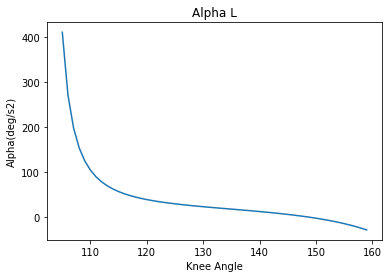

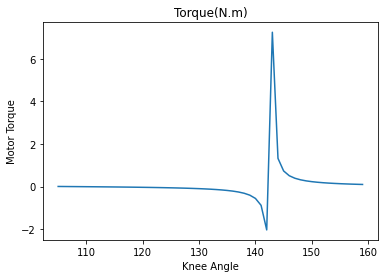

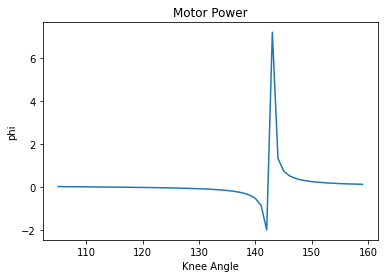

False


In [ ]:
def test():
    L = 0.22
    R = 0.05
    N = 0.08
    global H
 
    omega = 10 * (np.pi / 30)  # const omega @10RPM for knee joint
    alpha = 0  # Angular Acceleration of joint is zero
 
    Omega2 = list("")
    Alpha2 = list("")
    torque = list("")
    power = list("")

    Phi = list("")
    Psi = list("")

    singular_config = False

    for theta in range(105, 160):
        # tau = 0.2 * np.cos(np.pi - theta) * 1.5 * g    # 1.5kg of payload @ pelvis
        tau = 0  # Zero payload
        phi, psi, omega2, omega3, alpha2, alpha3, s = kinematic(omega, alpha, N, L, R, theta * np.pi / 180)
        if s:
            singular_config = True
        torque.append(kinetic(N, L, R, theta * np.pi / 180, phi, psi, omega, omega2, omega3,
                              alpha, alpha2, alpha3, tau)[0])
        power.append(kinetic(N, L, R, theta * np.pi / 180, phi, psi, omega, omega2, omega3,
                              alpha, alpha2, alpha3, tau)[1])
        
        Phi.append(phi * 180 / np.pi)
        Psi.append(psi * 180 / np.pi)
        Omega2.append(omega2 * 180 / np.pi)
        Alpha2.append(alpha2 * 180 / np.pi)
 
    plt.plot(range(105, 160), Phi)
    plt.title("joint Angles")
    plt.xlabel("Knee Angle")
    plt.ylabel("phi")
    plt.show()
 
    plt.plot(range(105, 160), Psi)
    plt.title("Joint Angles")
    plt.xlabel("Knee Angle")
    plt.ylabel("psi")
    plt.show()
 
    plt.plot(range(105, 160), Omega2)
    plt.title("Omega L")
    plt.xlabel("Knee Angle")
    plt.ylabel("Omega (deg/s)")
    plt.show()
 
    plt.plot(range(105, 160), Alpha2)
    plt.title("Alpha L")
    plt.xlabel("Knee Angle")
    plt.ylabel("Alpha(deg/s2)")
    plt.show()
 
    plt.plot(range(105, 160), torque)
    plt.xlabel("Knee Angle")
    plt.ylabel("Motor Torque")
    plt.title("Torque(N.m)")
    plt.show()

    plt.plot(range(105, 160), power)
    plt.title("Motor Power")
    plt.xlabel("Knee Angle")
    plt.ylabel("phi")
    plt.show()
    
    print (singular_config)
    
    pass
test()

Genetic algorithm

In [ ]:
def cost_fcn(x):
    N = x[0]
    L = x[1]
    R = x[2]
    omega = 10 * np.pi /30      # constant angular velocity @ 10rpm
    alpha = 0

    power = list("")
    torque = list("")

    for theta in range(105, 170):
        tau = 0.2 * np.cos(np.pi - theta) * 1.5 * g    # 1.5kg of payload @ pelvis
        #tau = 0  # Zero payload
        try:
            phi, psi, omega2, omega3, alpha2, alpha3, s = kinematic(omega, alpha, N, L, R, theta * np.pi / 180)
            if s:
                return 10000 # Singular solutions are not valid
        except:
            return 10000 # Singular solutions are not valid
        torque.append(kinetic(N, L, R, theta * np.pi / 180, phi, psi, omega, omega2, omega3,
                              alpha, alpha2, alpha3, tau)[0])
        power.append(kinetic(N, L, R, theta * np.pi / 180, phi, psi, omega, omega2, omega3,
                              alpha, alpha2, alpha3, tau)[0])

    power = np.array(power)
    power = np.sum(np.abs(power))
    torque = np.array(torque)
    torque = np.sum(np.abs(torque))
    return torque + power
 
 
var_bound=np.array([[0.05,0.1],
                    [0.15,0.25],
                    [0.05,0.15]])
 
algorithm_param = {'max_num_iteration': 5000,
                    'population_size':200,
                    'mutation_probability':0.09,
                    'elit_ratio': 0.0,
                    'crossover_probability': 0.5,
                    'parents_portion': 0.4,
                    'crossover_type':'uniform',
                    'max_iteration_without_improv':600}
 
model=ga(function=cost_fcn,dimension=3,variable_type='real',
            variable_boundaries=var_bound,
            algorithm_parameters=algorithm_param,
            convergence_curve=True, progress_bar=True,function_timeout=30)
model.run()

|_________________________________________________ 1.6% GA is running...

KeyboardInterrupt: ignored

 The best solution found:
 [0.09703111 0.2242061  0.05143278]

 Objective function:
 916.574252708823


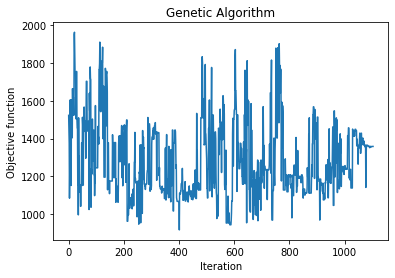

In [ ]:
def cost_fcn(x):
    N = x[0]
    L = x[1]
    R = x[2]
    omega = 10 * np.pi /30      # constant angular velocity @ 10rpm
    alpha = 0

    power = list("")
    torque = list("")

    for theta in range(105, 170):
        tau = 0.2 * np.cos(np.pi - theta) * 1.5 * g    # 1.5kg of payload @ pelvis
        #tau = 0  # Zero payload
        try:
            phi, psi, omega2, omega3, alpha2, alpha3, s = kinematic(omega, alpha, N, L, R, theta * np.pi / 180)
            if s:
                return 10000 # Singular solutions are not valid
        except:
            return 10000 # Singular solutions are not valid
        torque.append(kinetic(N, L, R, theta * np.pi / 180, phi, psi, omega, omega2, omega3,
                              alpha, alpha2, alpha3, tau)[0])
        power.append(kinetic(N, L, R, theta * np.pi / 180, phi, psi, omega, omega2, omega3,
                              alpha, alpha2, alpha3, tau)[0])

    power = np.array(power)
    power = np.sum(np.abs(power))
    torque = np.array(torque)
    torque = np.sum(np.abs(torque))
    return torque + power
 
 
var_bound=np.array([[0.05,0.1],
                    [0.15,0.25],
                    [0.05,0.15]])
 
algorithm_param = {'max_num_iteration': 4000,
                    'population_size':200,
                    'mutation_probability':0.08,
                    'elit_ratio': 0.0,
                    'crossover_probability': 0.5,
                    'parents_portion': 0.4,
                    'crossover_type':'uniform',
                    'max_iteration_without_improv':700}
 
model=ga(function=cost_fcn,dimension=3,variable_type='real',
            variable_boundaries=var_bound,
            algorithm_parameters=algorithm_param,
            convergence_curve=True, progress_bar=True,function_timeout=30)
model.run()

 The best solution found:
 [0.098396   0.22254158 0.0524511 ]

 Objective function:
 951.5618710893056


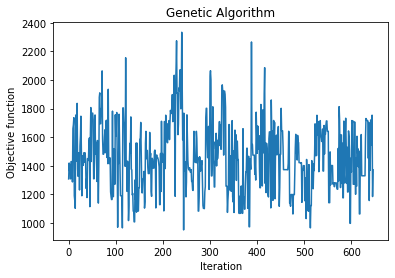

In [ ]:
def cost_fcn(x):
    N = x[0]
    L = x[1]
    R = x[2]
    omega = 10 * np.pi /30      # constant angular velocity @ 10rpm
    alpha = 0

    power = list("")
    torque = list("")

    for theta in range(105, 170):
        tau = 0.2 * np.cos(np.pi - theta) * 1.5 * g    # 1.5kg of payload @ pelvis
        #tau = 0  # Zero payload
        try:
            phi, psi, omega2, omega3, alpha2, alpha3, s = kinematic(omega, alpha, N, L, R, theta * np.pi / 180)
            if s:
                return 15000 # Singular solutions are not valid
        except:
            return 15000 # Singular solutions are not valid
        torque.append(kinetic(N, L, R, theta * np.pi / 180, phi, psi, omega, omega2, omega3,
                              alpha, alpha2, alpha3, tau)[0])
        power.append(kinetic(N, L, R, theta * np.pi / 180, phi, psi, omega, omega2, omega3,
                              alpha, alpha2, alpha3, tau)[0])

    power = np.array(power)
    power = np.sum(np.abs(power))
    torque = np.array(torque)
    torque = np.sum(np.abs(torque))
    return torque + power
 
 
var_bound=np.array([[0.05,0.1],
                    [0.15,0.25],
                    [0.05,0.15]])
 
algorithm_param = {'max_num_iteration': 5000,
                    'population_size':200,
                    'mutation_probability':0.15,
                    'elit_ratio': 0.0,
                    'crossover_probability': 0.5,
                    'parents_portion': 0.3,
                    'crossover_type':'uniform',
                    'max_iteration_without_improv':400}
 
model=ga(function=cost_fcn,dimension=3,variable_type='real',
            variable_boundaries=var_bound,
            algorithm_parameters=algorithm_param,
            convergence_curve=True, progress_bar=True,function_timeout=30)
model.run()

In [ ]:
print(cost_fcn([0.08,0.22,0.05]))
print(cost_fcn([0.09,0.22,0.06]))
print(cost_fcn([0.08,0.22,0.06]))
print(cost_fcn([0.095,0.22,0.05]))

1088.7167574142081
1185.2050832129262
1469.960399662156
928.6094686774684
